# Customer Retention Analysis: Data Exploration & Foundation

**Author:** Harpinder Singh  
**Dataset:** UCI Online Retail II (UK E-Commerce)  
**Objective:** Build foundation for probabilistic CLV modeling and churn prediction

---

## Table of Contents
1. [Environment Setup](#1.-Environment-Setup)
2. [Data Loading & Initial Inspection](#2.-Data-Loading-&-Initial-Inspection)
3. [Data Quality Assessment](#3.-Data-Quality-Assessment)
4. [Data Cleaning & Preprocessing](#4.-Data-Cleaning-&-Preprocessing)
5. [Exploratory Data Analysis](#5.-Exploratory-Data-Analysis)
6. [Temporal Split Creation](#6.-Temporal-Split-Creation)
7. [RFM Feature Engineering](#7.-RFM-Feature-Engineering)
8. [Export Processed Data](#8.-Export-Processed-Data)

---

## 1. Environment Setup

╔════════════════════════════════════════════════════════════════╗
║                    ENVIRONMENT CONFIGURATION                    ║
╚════════════════════════════════════════════════════════════════╝

In [1]:
# Standard library imports
import warnings
from pathlib import Path
from datetime import datetime, timedelta

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ Environment configured successfully")
print(f"   Pandas version: {pd.__version__}")
print(f"   NumPy version: {np.__version__}")

✅ Environment configured successfully
   Pandas version: 2.3.3
   NumPy version: 1.26.4


In [2]:
# ┌────────────────────────────────────────────────────────────┐
# │ Directory Structure Setup                                  │
# └────────────────────────────────────────────────────────────┘

# Define project root (handles execution from different directories)
PROJECT_ROOT = Path.cwd()
if PROJECT_ROOT.name == 'notebooks':
    PROJECT_ROOT = PROJECT_ROOT.parent

# Define all project directories
DIR_DATA_RAW = PROJECT_ROOT / 'data' / 'raw'
DIR_DATA_PROCESSED = PROJECT_ROOT / 'data' / 'processed'
DIR_MODELS = PROJECT_ROOT / 'models'
DIR_RESULTS = PROJECT_ROOT / 'results'
DIR_FIGURES = PROJECT_ROOT / 'results' / 'figures'

# Create directories if they don't exist
for directory in [DIR_DATA_PROCESSED, DIR_MODELS, DIR_RESULTS, DIR_FIGURES]:
    directory.mkdir(parents=True, exist_ok=True)

print("✅ Directory structure verified")
print(f"   Project root: {PROJECT_ROOT}")
print(f"   Raw data: {DIR_DATA_RAW}")
print(f"   Processed data: {DIR_DATA_PROCESSED}")
print(f"   Figures: {DIR_FIGURES}")

✅ Directory structure verified
   Project root: d:\Courses\Workstation\Github\Working Projects\GitHub Project 3 - Customer Churn\Customer_Segmentation_Retention_Analysis
   Raw data: d:\Courses\Workstation\Github\Working Projects\GitHub Project 3 - Customer Churn\Customer_Segmentation_Retention_Analysis\data\raw
   Processed data: d:\Courses\Workstation\Github\Working Projects\GitHub Project 3 - Customer Churn\Customer_Segmentation_Retention_Analysis\data\processed
   Figures: d:\Courses\Workstation\Github\Working Projects\GitHub Project 3 - Customer Churn\Customer_Segmentation_Retention_Analysis\results\figures


---

## 2. Data Loading & Initial Inspection

╔════════════════════════════════════════════════════════════════╗
║                      DATA LOADING                               ║
╚════════════════════════════════════════════════════════════════╝

In [3]:
# ┌────────────────────────────────────────────────────────────┐
# │ Load Raw Data                                              │
# └────────────────────────────────────────────────────────────┘

# File path
file_path = DIR_DATA_RAW / 'Online Retail.xlsx'

print(f"Loading data from: {file_path}")
print("⏳ This may take 30-60 seconds...\n")

# Load Excel file
df_raw = pd.read_excel(file_path, engine='openpyxl')

print(f"✅ Data loaded successfully")
print(f"   Shape: {df_raw.shape}")
print(f"   Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading data from: d:\Courses\Workstation\Github\Working Projects\GitHub Project 3 - Customer Churn\Customer_Segmentation_Retention_Analysis\data\raw\Online Retail.xlsx
⏳ This may take 30-60 seconds...

✅ Data loaded successfully
   Shape: (541909, 8)
   Memory usage: 134.93 MB


In [4]:
# ┌────────────────────────────────────────────────────────────┐
# │ Initial Data Inspection                                    │
# └────────────────────────────────────────────────────────────┘

print("Dataset Overview:")
print("="*80)
df_raw.info()

print("\n" + "="*80)
print("First 5 rows:")
print("="*80)
display(df_raw.head())

print("\n" + "="*80)
print("Statistical Summary:")
print("="*80)
display(df_raw.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

First 5 rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom



Statistical Summary:


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


In [5]:
# ┌────────────────────────────────────────────────────────────┐
# │ Column Analysis                                            │
# └────────────────────────────────────────────────────────────┘

print("Column Details:")
print("="*80)

for col in df_raw.columns:
    print(f"\n{col}:")
    print(f"  Type: {df_raw[col].dtype}")
    print(f"  Non-null: {df_raw[col].notna().sum():,} ({df_raw[col].notna().sum()/len(df_raw)*100:.2f}%)")
    print(f"  Unique: {df_raw[col].nunique():,}")
    
    if df_raw[col].dtype == 'object':
        print(f"  Sample values: {df_raw[col].dropna().unique()[:3].tolist()}")
    else:
        print(f"  Range: [{df_raw[col].min()}, {df_raw[col].max()}]")

Column Details:

InvoiceNo:
  Type: object
  Non-null: 541,909 (100.00%)
  Unique: 25,900
  Sample values: [536365, 536366, 536367]

StockCode:
  Type: object
  Non-null: 541,909 (100.00%)
  Unique: 4,070
  Sample values: ['85123A', 71053, '84406B']

Description:
  Type: object
  Non-null: 540,455 (99.73%)
  Unique: 4,223
  Sample values: ['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER']

Quantity:
  Type: int64
  Non-null: 541,909 (100.00%)
  Unique: 722
  Range: [-80995, 80995]

InvoiceDate:
  Type: datetime64[ns]
  Non-null: 541,909 (100.00%)
  Unique: 23,260
  Range: [2010-12-01 08:26:00, 2011-12-09 12:50:00]

UnitPrice:
  Type: float64
  Non-null: 541,909 (100.00%)
  Unique: 1,630
  Range: [-11062.06, 38970.0]

CustomerID:
  Type: float64
  Non-null: 406,829 (75.07%)
  Unique: 4,372
  Range: [12346.0, 18287.0]

Country:
  Type: object
  Non-null: 541,909 (100.00%)
  Unique: 38
  Sample values: ['United Kingdom', 'France', 'Australia']


---

## 3. Data Quality Assessment

╔════════════════════════════════════════════════════════════════╗
║                   DATA QUALITY ANALYSIS                         ║
╚════════════════════════════════════════════════════════════════╝

Missing Value Summary:


,Column,Missing_Count,Missing_Percentage
CustomerID,CustomerID,135080,24.93
Description,Description,1454,0.27


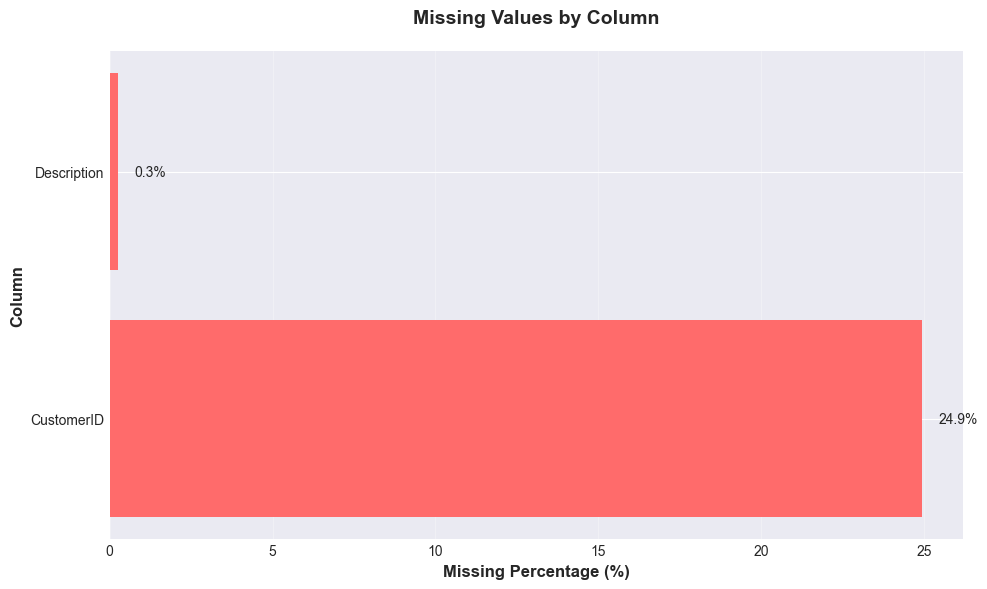

In [6]:
# ┌────────────────────────────────────────────────────────────┐
# │ Missing Value Analysis                                     │
# └────────────────────────────────────────────────────────────┘

missing_data = pd.DataFrame({
    'Column': df_raw.columns,
    'Missing_Count': df_raw.isnull().sum(),
    'Missing_Percentage': (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print("Missing Value Summary:")
print("="*80)
display(missing_data[missing_data['Missing_Count'] > 0])

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
missing_data_plot = missing_data[missing_data['Missing_Count'] > 0]

if not missing_data_plot.empty:
    ax.barh(missing_data_plot['Column'], missing_data_plot['Missing_Percentage'], color='#FF6B6B')
    ax.set_xlabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Column', fontsize=12, fontweight='bold')
    ax.set_title('Missing Values by Column', fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3)
    
    # Add percentage labels
    for i, (idx, row) in enumerate(missing_data_plot.iterrows()):
        ax.text(row['Missing_Percentage'] + 0.5, i, f"{row['Missing_Percentage']:.1f}%", 
                va='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(DIR_FIGURES / '01_missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No missing values detected!")

In [7]:
# ┌────────────────────────────────────────────────────────────┐
# │ Duplicate Transaction Analysis                            │
# └────────────────────────────────────────────────────────────┘

duplicates = df_raw.duplicated().sum()
print(f"Duplicate Rows: {duplicates:,} ({duplicates/len(df_raw)*100:.2f}%)")

# Check for potential duplicate invoices
duplicate_invoices = df_raw.groupby('InvoiceNo').size()
print(f"\nUnique Invoices: {df_raw['InvoiceNo'].nunique():,}")
print(f"Total Transactions: {len(df_raw):,}")
print(f"Avg Items per Invoice: {len(df_raw) / df_raw['InvoiceNo'].nunique():.2f}")

Duplicate Rows: 5,268 (0.97%)

Unique Invoices: 25,900
Total Transactions: 541,909
Avg Items per Invoice: 20.92


In [8]:
# ┌────────────────────────────────────────────────────────────┐
# │ Data Anomaly Detection                                     │
# └────────────────────────────────────────────────────────────┘

print("Data Anomalies:")
print("="*80)

# Negative quantities (returns)
negative_qty = df_raw[df_raw['Quantity'] < 0]
print(f"\n1. Negative Quantities (Returns):")
print(f"   Count: {len(negative_qty):,} ({len(negative_qty)/len(df_raw)*100:.2f}%)")
print(f"   Unique Invoices: {negative_qty['InvoiceNo'].nunique():,}")

# Negative prices
negative_price = df_raw[df_raw['UnitPrice'] < 0]
print(f"\n2. Negative Unit Prices:")
print(f"   Count: {len(negative_price):,} ({len(negative_price)/len(df_raw)*100:.2f}%)")

# Zero prices
zero_price = df_raw[df_raw['UnitPrice'] == 0]
print(f"\n3. Zero Unit Prices:")
print(f"   Count: {len(zero_price):,} ({len(zero_price)/len(df_raw)*100:.2f}%)")
print(f"   Sample descriptions: {zero_price['Description'].dropna().unique()[:5].tolist()}")

# High quantity outliers
high_qty = df_raw[df_raw['Quantity'] > df_raw['Quantity'].quantile(0.99)]
print(f"\n4. High Quantity Outliers (>99th percentile):")
print(f"   Threshold: {df_raw['Quantity'].quantile(0.99):.0f} units")
print(f"   Count: {len(high_qty):,}")
print(f"   Max quantity: {df_raw['Quantity'].max():,.0f}")

Data Anomalies:

1. Negative Quantities (Returns):
   Count: 10,624 (1.96%)
   Unique Invoices: 5,172

2. Negative Unit Prices:
   Count: 2 (0.00%)

3. Zero Unit Prices:
   Count: 2,515 (0.46%)
   Sample descriptions: ['amazon', '?', 'ROUND CAKE TIN VINTAGE GREEN', 'check', 'damages']

4. High Quantity Outliers (>99th percentile):
   Threshold: 100 units
   Count: 4,950
   Max quantity: 80,995


Top 15 Countries by Transaction Count:


Country
United Kingdom     495478
Germany              9495
France               8557
EIRE                 8196
Spain                2533
Netherlands          2371
Belgium              2069
Switzerland          2002
Portugal             1519
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Name: count, dtype: int64


United Kingdom transactions: 495,478 (91.43%)


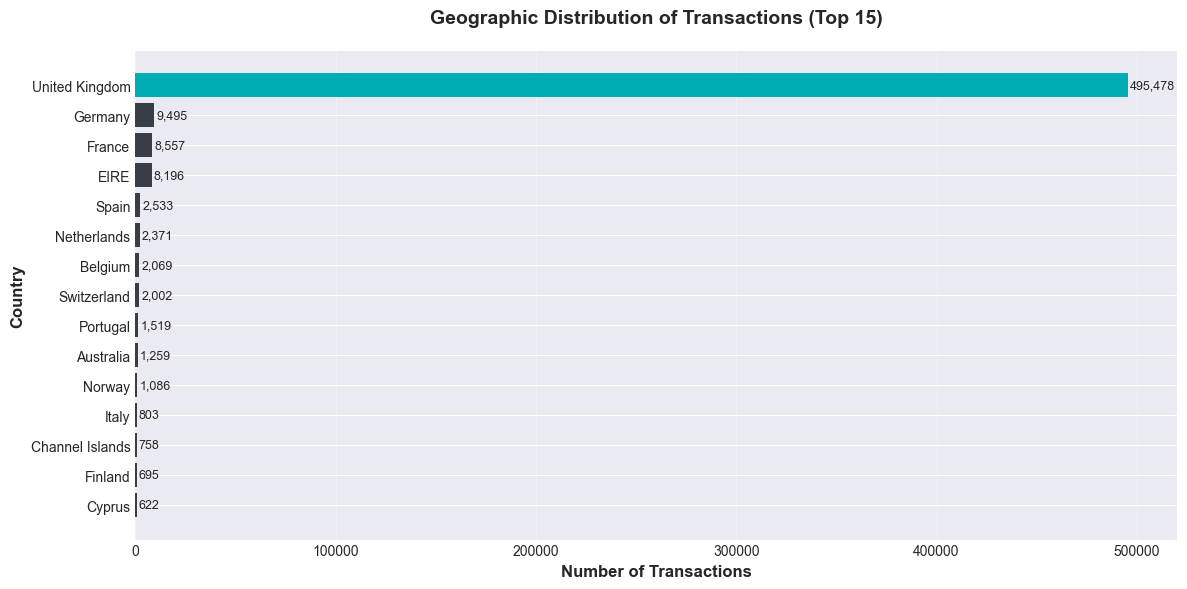

In [9]:
# ┌────────────────────────────────────────────────────────────┐
# │ Geographic Distribution                                    │
# └────────────────────────────────────────────────────────────┘

country_dist = df_raw['Country'].value_counts()

print("Top 15 Countries by Transaction Count:")
print("="*80)
display(country_dist.head(15))

print(f"\nUnited Kingdom transactions: {country_dist.get('United Kingdom', 0):,} ({country_dist.get('United Kingdom', 0)/len(df_raw)*100:.2f}%)")

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
top_countries = country_dist.head(15)
colors = ['#00ADB5' if country == 'United Kingdom' else '#393E46' for country in top_countries.index]

ax.barh(range(len(top_countries)), top_countries.values, color=colors)
ax.set_yticks(range(len(top_countries)))
ax.set_yticklabels(top_countries.index)
ax.set_xlabel('Number of Transactions', fontsize=12, fontweight='bold')
ax.set_ylabel('Country', fontsize=12, fontweight='bold')
ax.set_title('Geographic Distribution of Transactions (Top 15)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

# Add value labels
for i, v in enumerate(top_countries.values):
    ax.text(v + 1000, i, f'{v:,}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(DIR_FIGURES / '02_country_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

---

## 4. Data Cleaning & Preprocessing

╔════════════════════════════════════════════════════════════════╗
║                    DATA CLEANING PIPELINE                       ║
╚════════════════════════════════════════════════════════════════╝

### Cleaning Strategy:
1. Remove rows with missing CustomerID (required for customer-level analysis)
2. Filter to United Kingdom only (domain coherence)
3. Handle return transactions (negative quantities)
4. Remove invalid prices (negative or zero)
5. Create revenue column
6. Parse and validate datetime

In [10]:
# ┌────────────────────────────────────────────────────────────┐
# │ Data Cleaning Pipeline                                     │
# └────────────────────────────────────────────────────────────┘

# Start with a copy
df = df_raw.copy()
print(f"Starting shape: {df.shape}")
print("\nCleaning steps:")
print("="*80)

# Step 1: Remove missing CustomerID
initial_count = len(df)
df = df[df['CustomerID'].notna()]
print(f"1. Removed missing CustomerID: {initial_count - len(df):,} rows removed")
print(f"   Remaining: {len(df):,} rows")

# Step 2: Filter to UK only
initial_count = len(df)
df = df[df['Country'] == 'United Kingdom']
print(f"\n2. Filtered to UK market: {initial_count - len(df):,} rows removed")
print(f"   Remaining: {len(df):,} rows")

# Step 3: Remove invalid prices
initial_count = len(df)
df = df[df['UnitPrice'] > 0]
print(f"\n3. Removed invalid prices (≤0): {initial_count - len(df):,} rows removed")
print(f"   Remaining: {len(df):,} rows")

# Step 4: Separate returns from purchases
returns = df[df['Quantity'] < 0].copy()
purchases = df[df['Quantity'] > 0].copy()
print(f"\n4. Separated transactions:")
print(f"   Returns: {len(returns):,} rows ({len(returns)/len(df)*100:.2f}%)")
print(f"   Purchases: {len(purchases):,} rows ({len(purchases)/len(df)*100:.2f}%)")

# Step 5: Calculate revenue for purchases
purchases['Revenue'] = purchases['Quantity'] * purchases['UnitPrice']
print(f"\n5. Revenue column created")
print(f"   Total revenue: £{purchases['Revenue'].sum():,.2f}")
print(f"   Average transaction: £{purchases['Revenue'].mean():.2f}")

# Step 6: Convert CustomerID to integer
purchases['CustomerID'] = purchases['CustomerID'].astype(int)
print(f"\n6. CustomerID converted to integer")
print(f"   Unique customers: {purchases['CustomerID'].nunique():,}")

# Step 7: Ensure datetime type
if not pd.api.types.is_datetime64_any_dtype(purchases['InvoiceDate']):
    purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])
print(f"\n7. InvoiceDate validated as datetime")
print(f"   Date range: {purchases['InvoiceDate'].min()} to {purchases['InvoiceDate'].max()}")

print("\n" + "="*80)
print(f"✅ Cleaning complete!")
print(f"   Final shape: {purchases.shape}")
print(f"   Data reduction: {(1 - len(purchases)/len(df_raw))*100:.2f}%")

Starting shape: (541909, 8)

Cleaning steps:
1. Removed missing CustomerID: 135,080 rows removed
   Remaining: 406,829 rows

2. Filtered to UK market: 44,951 rows removed
   Remaining: 361,878 rows

3. Removed invalid prices (≤0): 24 rows removed
   Remaining: 361,854 rows

4. Separated transactions:
   Returns: 7,533 rows (2.08%)
   Purchases: 354,321 rows (97.92%)

5. Revenue column created
   Total revenue: £7,308,391.55
   Average transaction: £20.63

6. CustomerID converted to integer
   Unique customers: 3,920

7. InvoiceDate validated as datetime
   Date range: 2010-12-01 08:26:00 to 2011-12-09 12:49:00

✅ Cleaning complete!
   Final shape: (354321, 9)
   Data reduction: 34.62%


Return Transaction Summary:
Total return value: £540,518.16
Average return value: £71.75
Return rate by value: 7.40%


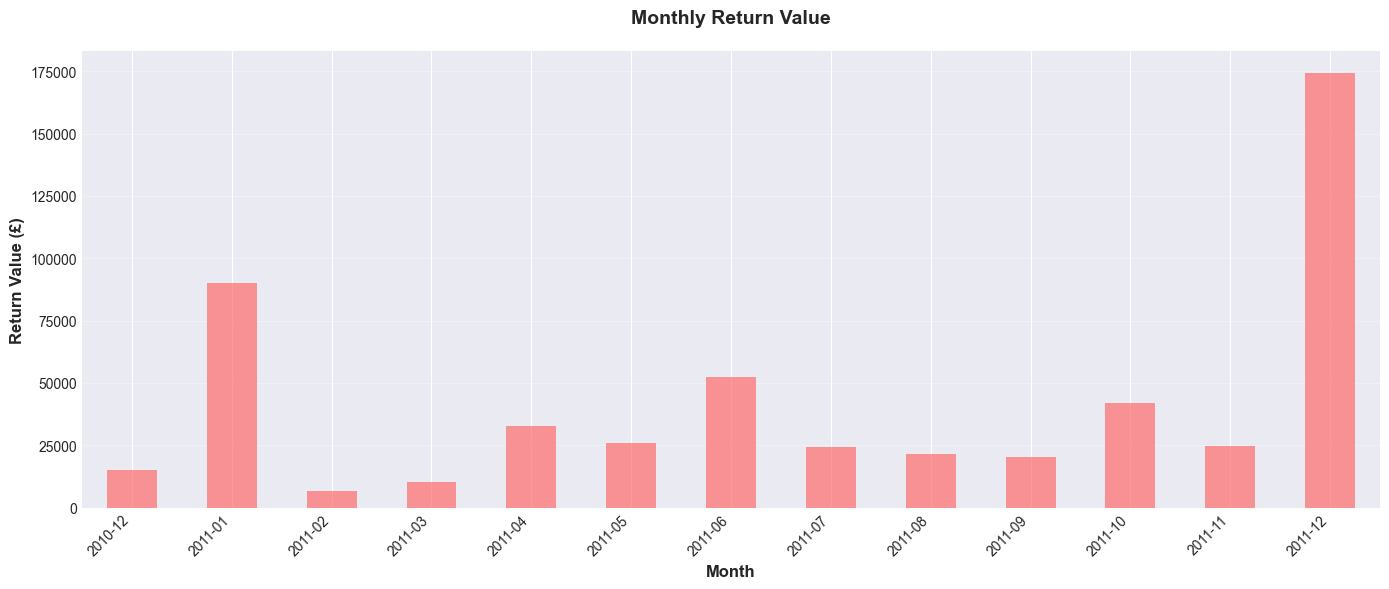

In [11]:
# ┌────────────────────────────────────────────────────────────┐
# │ Return Transaction Analysis                               │
# └────────────────────────────────────────────────────────────┘

# Calculate return metrics
returns['ReturnValue'] = abs(returns['Quantity'] * returns['UnitPrice'])
returns_by_month = returns.groupby(returns['InvoiceDate'].dt.to_period('M'))['ReturnValue'].sum()

print("Return Transaction Summary:")
print("="*80)
print(f"Total return value: £{returns['ReturnValue'].sum():,.2f}")
print(f"Average return value: £{returns['ReturnValue'].mean():.2f}")
print(f"Return rate by value: {returns['ReturnValue'].sum() / purchases['Revenue'].sum() * 100:.2f}%")

# Visualization
fig, ax = plt.subplots(figsize=(14, 6))
returns_by_month.plot(kind='bar', ax=ax, color='#FF6B6B', alpha=0.7)
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Return Value (£)', fontsize=12, fontweight='bold')
ax.set_title('Monthly Return Value', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(DIR_FIGURES / '03_return_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

---

## 5. Exploratory Data Analysis

╔════════════════════════════════════════════════════════════════╗
║              EXPLORATORY DATA ANALYSIS (EDA)                    ║
╚════════════════════════════════════════════════════════════════╝

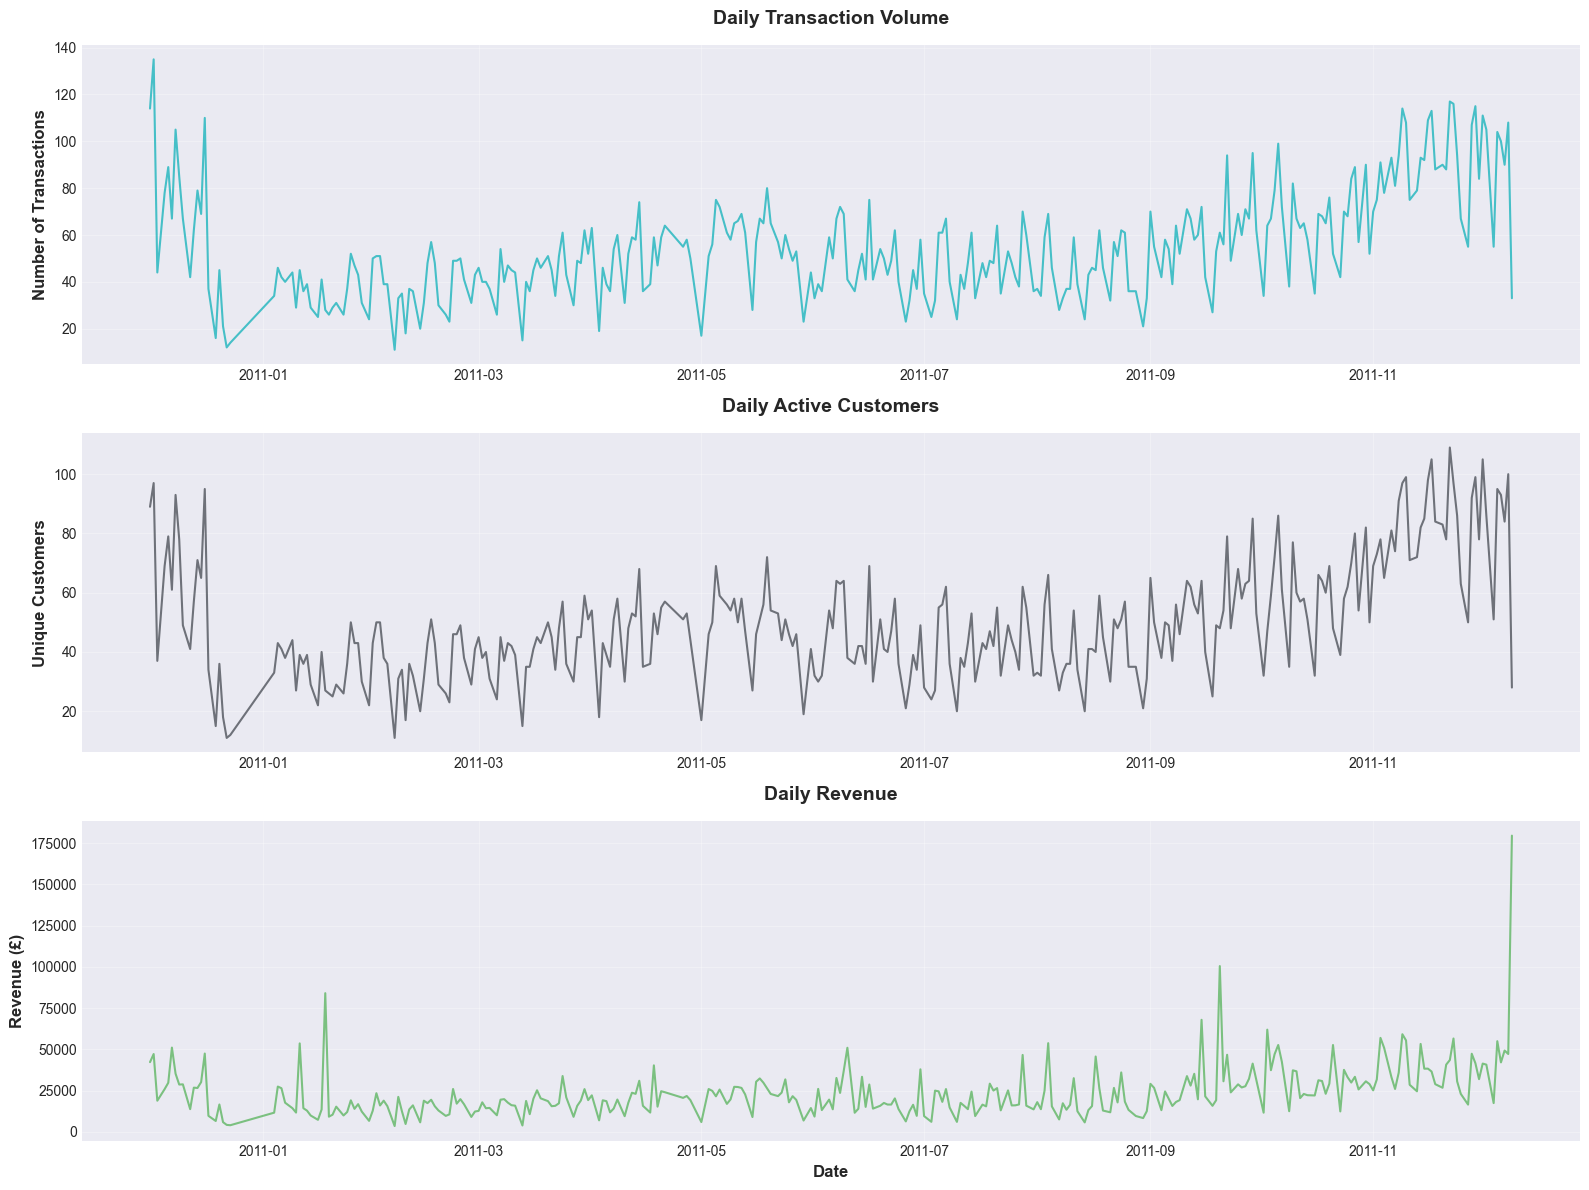

Date range: 2010-12-01 to 2011-12-09
Average daily transactions: 55
Average daily revenue: £23,961.94


In [12]:
# ┌────────────────────────────────────────────────────────────┐
# │ Temporal Patterns: Transaction Volume Over Time           │
# └────────────────────────────────────────────────────────────┘

# Aggregate by day
daily_transactions = purchases.groupby(purchases['InvoiceDate'].dt.date).agg({
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique',
    'Revenue': 'sum'
}).reset_index()
daily_transactions.columns = ['Date', 'Transactions', 'Customers', 'Revenue']

# Visualization
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Transactions over time
axes[0].plot(daily_transactions['Date'], daily_transactions['Transactions'], 
             color='#00ADB5', linewidth=1.5, alpha=0.7)
axes[0].set_ylabel('Number of Transactions', fontsize=12, fontweight='bold')
axes[0].set_title('Daily Transaction Volume', fontsize=14, fontweight='bold', pad=15)
axes[0].grid(alpha=0.3)

# Unique customers over time
axes[1].plot(daily_transactions['Date'], daily_transactions['Customers'], 
             color='#393E46', linewidth=1.5, alpha=0.7)
axes[1].set_ylabel('Unique Customers', fontsize=12, fontweight='bold')
axes[1].set_title('Daily Active Customers', fontsize=14, fontweight='bold', pad=15)
axes[1].grid(alpha=0.3)

# Revenue over time
axes[2].plot(daily_transactions['Date'], daily_transactions['Revenue'], 
             color='#4CAF50', linewidth=1.5, alpha=0.7)
axes[2].set_ylabel('Revenue (£)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Date', fontsize=12, fontweight='bold')
axes[2].set_title('Daily Revenue', fontsize=14, fontweight='bold', pad=15)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(DIR_FIGURES / '04_temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Date range: {daily_transactions['Date'].min()} to {daily_transactions['Date'].max()}")
print(f"Average daily transactions: {daily_transactions['Transactions'].mean():.0f}")
print(f"Average daily revenue: £{daily_transactions['Revenue'].mean():,.2f}")